In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def di(*args):
    fig2 = plt.figure(figsize = (15,10))
    num_args = len(*args)
    imgs = args[0]
    if num_args == 1:
        plt.subplot(111)
        plt.imshow(imgs[0],cmap = 'gray')
        plt.show()
    elif num_args == 2:
        plt.subplot(121)
        plt.imshow(imgs[0],cmap = 'gray')
        plt.subplot(122)
        plt.imshow(imgs[1],cmap = 'gray')
        plt.show()
    else:
        #i.e. 3 images
        plt.subplot(131)
        plt.imshow(imgs[0],cmap = 'gray')
        plt.subplot(132)
        plt.imshow(imgs[1],cmap = 'gray')
        plt.subplot(133)
        plt.imshow(imgs[2],cmap = 'gray')
        plt.show()

def d1(im, h=15, w=15):
    fig1 = plt.figure(figsize = (h,w))
    plt.subplot(111)
    plt.imshow(im)
    plt.show()

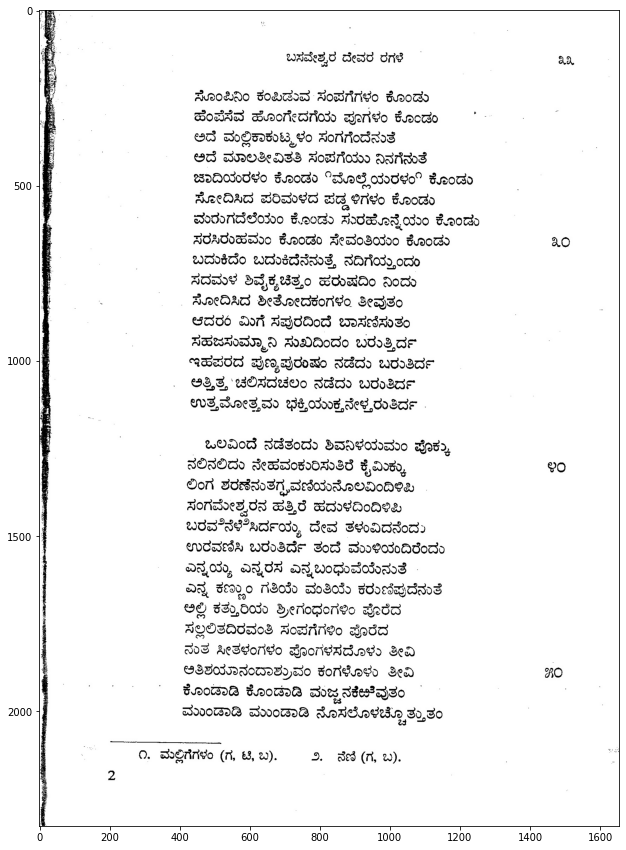

In [14]:
img = cv2.imread('harihara/pg86.jpg')
d1(img)

In [15]:
image = cv2.imread('harihara/pg86.jpg')
image.shape

(2328, 1655, 3)

[2088, 2088, 2089, 2089, 2090, 2090, 2091, 2091, 2091, 2090, 2090, 2089, 2089, 2088]
2089.5


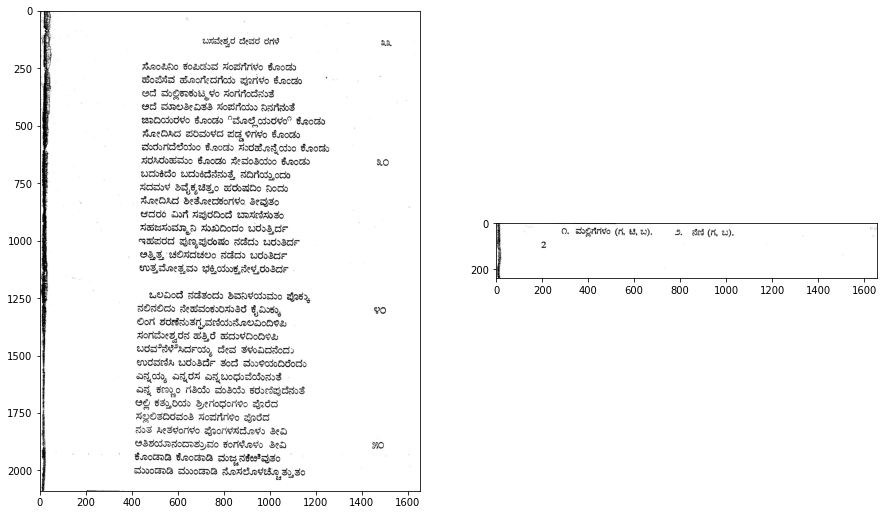

In [18]:
# Load image, convert to grayscale, Otsu's threshold
image = cv2.imread('harihara/pg86.jpg')
result = image.copy()
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Detect horizontal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))
detect_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(detect_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (36,255,12), 2)

# d1(result)

# print(cnts)
# list of points defining the fo
footer_points = []
for points in cnts:
    for point in points:
        avg.append(point[0][1])
print(avg)
print(sum(avg)/len(avg))


sep = int(sum(avg)/len(avg))
height, width, _ = image.shape
bottom = image[0:sep, 0:width]
top = image[sep:height, 0:width]
bottom_and_top = (bottom, top)
di(bottom_and_top)

In [15]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

In [16]:
lines = cv2.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

# cv2.imwrite('houghlines3.jpg',img)

In [34]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

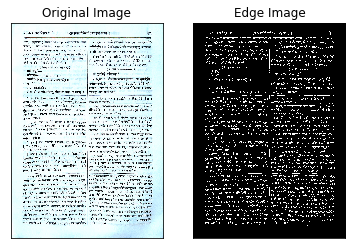

In [35]:
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [37]:
rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 5  # minimum number of votes (intersections in Hough grid cell)
min_line_len5h = 50  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = np.copy(img) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)

In [38]:
lines_edges = cv2.addWeighted(img, 0.8, line_image, 1, 0)

In [39]:
cv2.imwrite('line_image.jpg',line_image)

True

In [14]:
img = cv2.imread('pg89.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## (2) threshold
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)
hist = cv2.reduce(threshed,1, cv2.REDUCE_AVG).reshape(-1)

th = 1
H,W = img.shape[:2]
uppers = [y for y in range(H-1) if hist[y]<=th and hist[y+1]>th]
lowers = [y for y in range(H-1) if hist[y]>th and hist[y+1]<=th]

rotated = cv2.cvtColor(threshed, cv2.COLOR_GRAY2BGR)
for y in uppers:
    cv2.line(rotated, (0,y), (W, y), (255,0,0), 1)

for y in lowers:
    cv2.line(rotated, (0,y), (W, y), (0,255,0), 1)

cv2.imwrite("result.png", rotated)

True

Attempt 2

In [20]:
result = img.copy()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

In [21]:
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (70,1))
detect_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(detect_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (36,255,12), 2)

In [22]:
c

array([[[ 143,  162]],

       [[ 142,  163]],

       [[ 136,  163]],

       [[ 136,  164]],

       [[ 217,  164]],

       [[ 218,  165]],

       [[1035,  165]],

       [[1036,  164]],

       [[1038,  164]],

       [[1039,  165]],

       [[1165,  165]],

       [[1166,  166]],

       [[1387,  166]],

       [[1388,  165]],

       [[1460,  165]],

       [[1461,  164]],

       [[1461,  162]],

       [[1232,  162]],

       [[1231,  163]],

       [[1206,  163]],

       [[1205,  162]],

       [[ 840,  162]],

       [[ 839,  163]],

       [[ 838,  162]],

       [[ 393,  162]],

       [[ 392,  163]],

       [[ 391,  163]],

       [[ 390,  162]]], dtype=int32)

In [17]:
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,50))
detect_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
cnts = cv2.findContours(detect_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (36,255,12), 2)

In [18]:
cv2.imwrite("result.png", result)

True

In [23]:
edges = cv2.Canny(gray,50,150,apertureSize = 3)
cv2.imwrite('edges-50-150.jpg',edges)
minLineLength=100
lines = cv2.HoughLinesP(image=edges,rho=1,theta=np.pi/180, threshold=100,lines=np.array([]), minLineLength=minLineLength,maxLineGap=80)

a,b,c = lines.shape
for i in range(a):
    cv2.line(gray, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), (0, 0, 255), 3, cv2.LINE_AA)
    cv2.imwrite('houghlines5.jpg',gray)

# Attempt 3

In [38]:
# import the necessary packages
import numpy as np
import argparse
import imutils
import cv2
def sort_contours(cnts, method="left-to-right"):
	# initialize the reverse flag and sort index
	reverse = False
	i = 0
	# handle if we need to sort in reverse
	if method == "right-to-left" or method == "bottom-to-top":
		reverse = True
	# handle if we are sorting against the y-coordinate rather than
	# the x-coordinate of the bounding box
	if method == "top-to-bottom" or method == "bottom-to-top":
		i = 1
	# construct the list of bounding boxes and sort them from top to
	# bottom
	boundingBoxes = [cv2.boundingRect(c) for c in cnts]
	(cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
		key=lambda b:b[1][i], reverse=reverse))
	# return the list of sorted contours and bounding boxes
	return (cnts, boundingBoxes)

In [58]:
import cv2
import numpy as npThank
from imutils import contours

def box_extraction(img_for_box_extraction_path, cropped_dir_path):
    img = cv2.imread(img_for_box_extraction_path, 0)  # Read the image
    (thresh, img_bin) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)  # Thresholding the image
    img_bin = 255-img_bin  # Invert the image
    cv2.imwrite("Image_bin.jpg",img_bin)
   
    # Defining a kernel length
    kernel_length = np.array(img).shape[1]//40
     
    # A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
    verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
    # A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
    hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
    # A kernel of (3 X 3) ones.
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
# Morphological operation to detect verticle lines from an image
    img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
    verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
    cv2.imwrite("verticle_lines.jpg",verticle_lines_img)
# Morphological operation to detect horizontal lines from an image
    img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
    horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
    cv2.imwrite("horizontal_lines.jpg",horizontal_lines_img)
# Weighting parameters, this will decide the quantity of an image to be added to make a new image.
    alpha = 0.5
    beta = 1.0 - alpha
    # This function helps to add two image with specific weight parameter to get a third image as summation of two image.
    img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
    img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
    (thresh, img_final_bin) = cv2.threshold(img_final_bin, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# For Debugging
    # Enable this line to see verticle and horizontal lines in the image which is used to find boxes
    cv2.imwrite("img_final_bin.jpg",img_final_bin)
    # Find contours for image, which will detect all the boxes
    contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # Sort all the contours by top to bottom.
#     (contours, boundingBoxes) = sort_contours(contours, method = "top-to-bottom")
    idx = 0
    for c in contours:
        # Returns the location and width,height for every contour
        x, y, w, h = cv2.boundingRect(c)
# If the box height is greater then 20, widht is >80, then only save it as a box in "cropped/" folder.
#     if (w > 80 and h > 20) and w > 3*h:
    idx += 1
    new_img = img[y:y+h, x:x+w]
    str1 = cropped_dir_path+str(idx) + '.png'
    print(str1)
    cv2.imwrite(str1, new_img)
#     box_extraction("41.jpg", "./Cropped/")

In [59]:
box_extraction('pg89.png', 'ex')

ex1.png


# Google Cloud OCR trial

In [7]:
img = 'pg89.png'

In [8]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.types.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in text.bounding_poly.vertices])

        print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [9]:
detect_text(img)

ModuleNotFoundError: No module named 'google.cloud'